## Project Introduction

Using some simple visualization techniques, I will discover some insights regarding the relation between college majors and prospective employment opportunities:

In [ ]:
!pip install pandas --upgrade

In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
%matplotlib inline

from pandas.plotting import scatter_matrix 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-earnings-by-major/recent-grads.csv
/kaggle/input/college-earnings-by-major/college-earnings-by-major/recent-grads.csv


In [3]:
grads = pd.read_csv('/kaggle/input/college-earnings-by-major/recent-grads.csv')

In [4]:
grads.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


In [5]:
grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
grads.describe(include='object')

,Major,Major_category
count,173,173
unique,173,16
top,CRIMINAL JUSTICE AND FIRE PROTECTION,Engineering
freq,1,29


In [8]:
grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

Drop rows that contain NULL values

In [9]:
grads.dropna(inplace=True)
grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  172 non-null    int64  
 1   Major_code            172 non-null    int64  
 2   Major                 172 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        172 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           172 non-null    int64  
 9   Employed              172 non-null    int64  
 10  Full_time             172 non-null    int64  
 11  Part_time             172 non-null    int64  
 12  Full_time_year_round  172 non-null    int64  
 13  Unemployed            172 non-null    int64  
 14  Unemployment_rate     172 non-null    float64
 15  Median                1

### Some scatter plots to explore the relationships between various columns

`Total` and `Median`

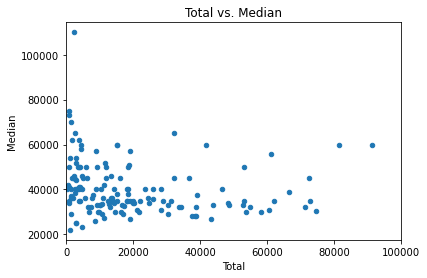

In [27]:
grads.plot(kind='scatter', x='Total', y='Median', xlabel='Major population', ylabel='Median income', title='Total vs. Median', xlim=(0, 100000))

There doesn't seem to be much of a relation between the expected income and the number of people enrolled in a major. Money doesn't dictate what people choose to study.

`Total` and `Unemployment_rate`

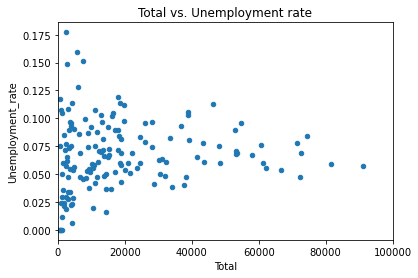

In [33]:
grads.plot(kind='scatter', x='Total', y='Unemployment_rate', title='Total vs. Unemployment rate', xlim=(0, 100000))

There doesn't seem to be much of a relation between the expected chance for employment and the number of people enrolled in a major either.

`Full_time` and `Median`

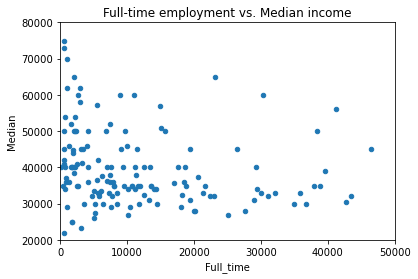

In [12]:
grads.plot(kind='scatter', x='Full_time', y='Median', title='Full-time employment vs. Median income', xlim=(0, 50000), ylim=(20000, 80000))

There doesn't seem to be much of a relation between the full-time employment and the median income.

`ShareWomen` and `Unemployment_rate`

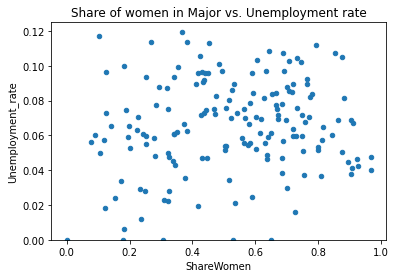

In [13]:
grads.plot(kind='scatter', x='ShareWomen', y='Unemployment_rate', title='Share of women in Major vs. Unemployment rate', ylim=(0, 0.125))

There doesn't seem to be much of a relation between the unemployment rate and the proportion of women enrolled in the reletive major. In theory, there isn't a difference in prospective employment rate between majors favored by women and men.

`Men` and `Median`

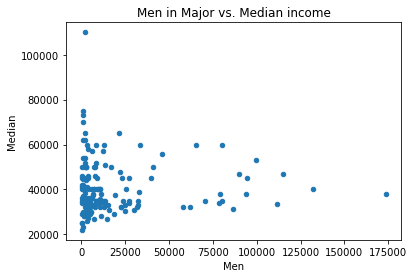

In [14]:
grads.plot(kind='scatter', x='Men', y='Median', title='Men in Major vs. Median income')

`Women` and `Median`

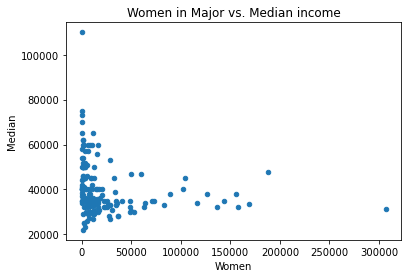

In [15]:
grads.plot(kind='scatter', x='Women', y='Median', title='Women in Major vs. Median income')

The expected income doesn't seem to be related to whether a major is favored by women or men.

### Next, we'll draw some histograms for certain columns

In [35]:
grads['Total'].describe()

count       172.000000
mean      39370.081395
std       63483.491009
min         124.000000
25%        4549.750000
50%       15104.000000
75%       38909.750000
max      393735.000000
Name: Total, dtype: float64

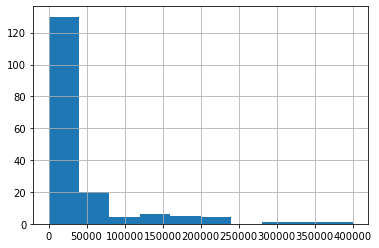

In [36]:
grads['Total'].hist(bins=10, range=(0, 400000))

Most majors have less than 200,000 people enrolled.

In [37]:
grads['Median'].describe()

count       172.000000
mean      40076.744186
std       11461.388773
min       22000.000000
25%       33000.000000
50%       36000.000000
75%       45000.000000
max      110000.000000
Name: Median, dtype: float64

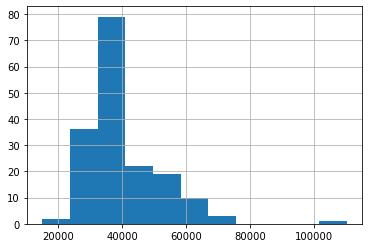

In [19]:
grads['Median'].hist(bins=11, range=(15000, 110000))

The expected average income for most majors is between \\$20,000 and \\$60,000.

In [20]:
employment_rate = (grads['Employed'] / grads['Total'])
employment_rate.describe()

count    172.000000
mean       0.788988
std        0.091892
min        0.000000
25%        0.749958
50%        0.803007
75%        0.841130
max        0.956165
dtype: float64

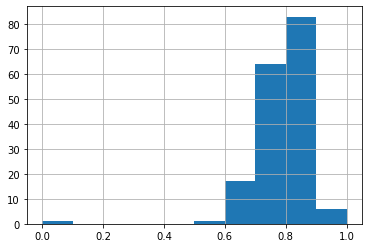

In [21]:
employment_rate.hist(bins=10, range=(0, 1))

The expected employment rate for most majors is between 50% and 90%.

In [38]:
grads['ShareWomen'].describe()

count    172.000000
mean       0.522223
std        0.231205
min        0.000000
25%        0.336026
50%        0.534024
75%        0.703299
max        0.968954
Name: ShareWomen, dtype: float64

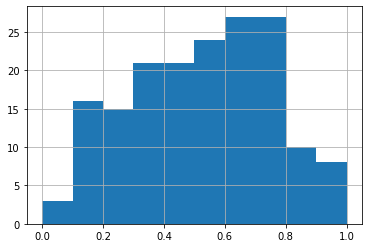

In [39]:
grads['ShareWomen'].hist(bins=10, range=(0, 1))

Few majors are overwhelmingly favored by men or women (around 20 out of 172).

### A Scatter Matrix of some employment-related data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7a8508450>,
      dtype=object)

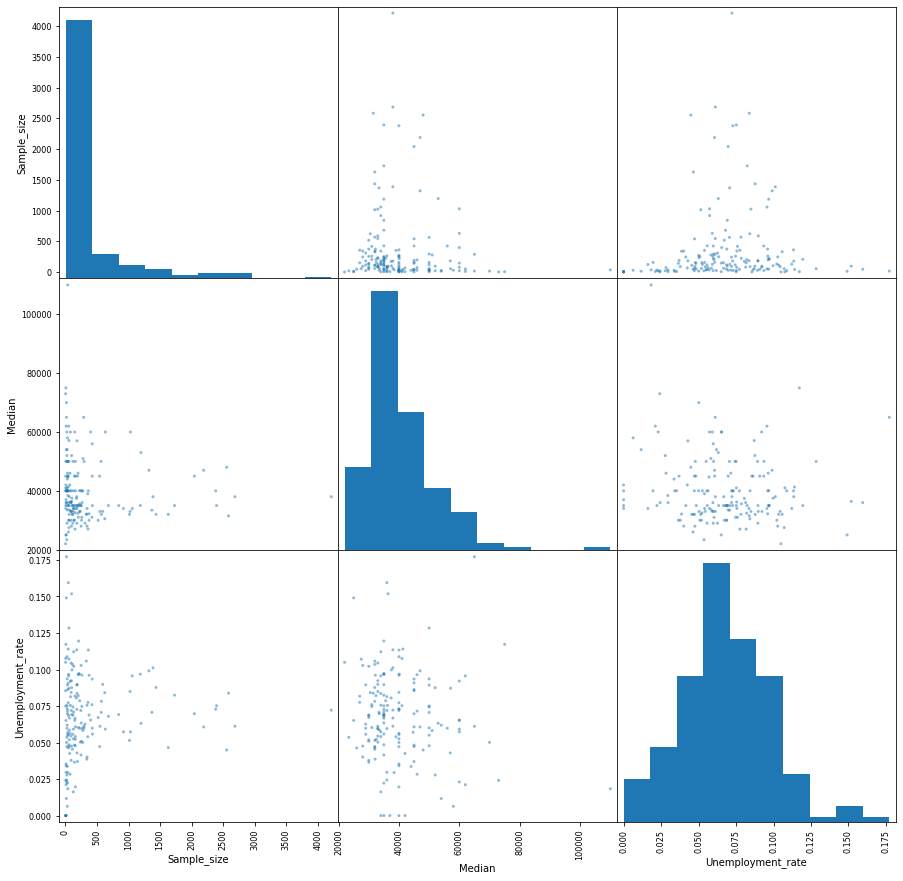

In [45]:
scatter_matrix(grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(15,15))

### Some bar plots

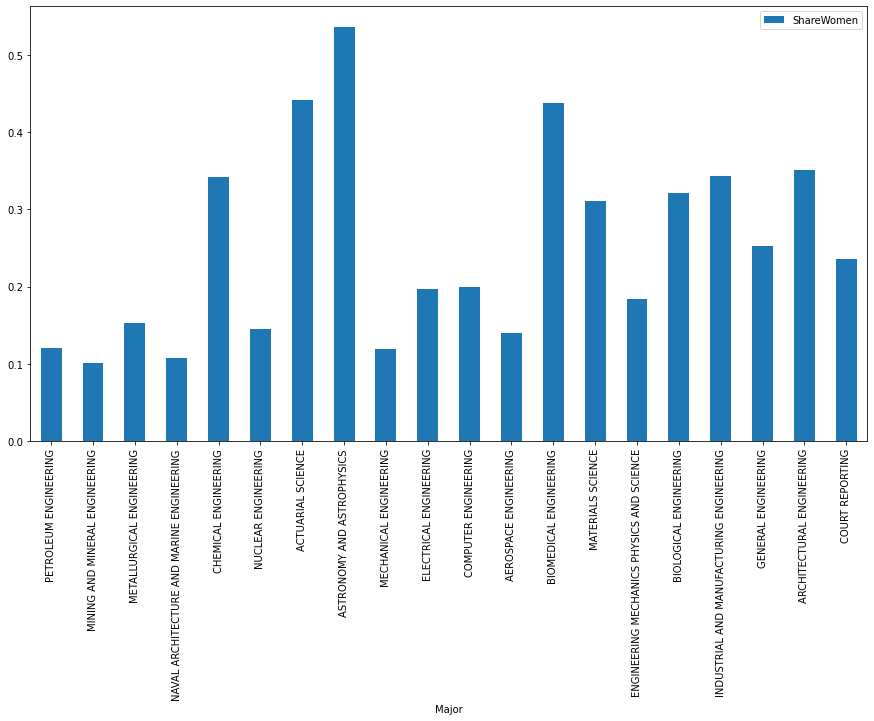

In [57]:
grads[:20].plot.bar(x='Major', y='ShareWomen', figsize=(15, 8))

Most of the top 20 paying majors have less than 50% female enrollees.

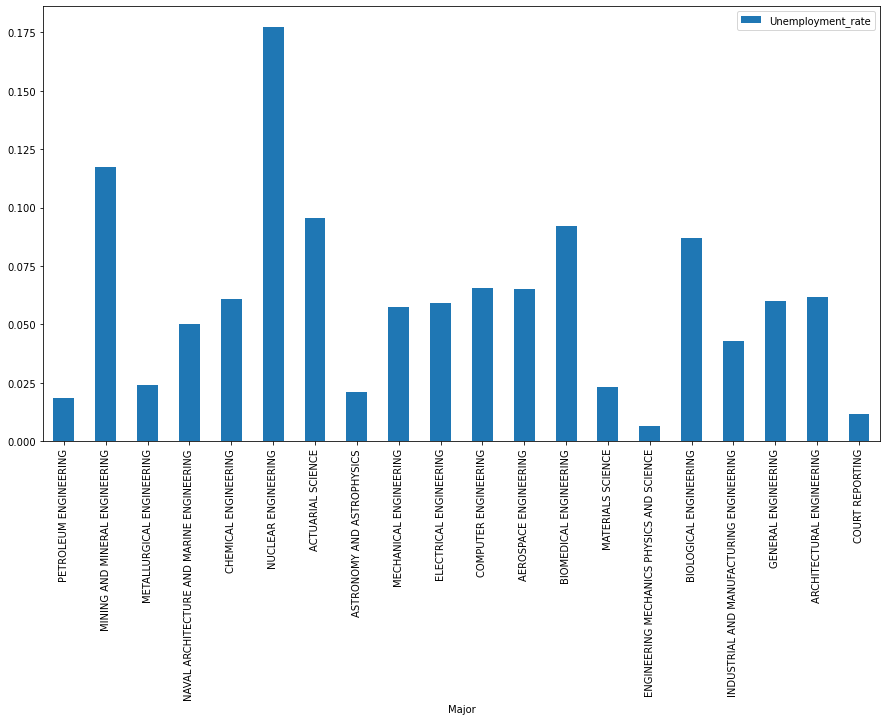

In [59]:
grads[:20].plot.bar(x='Major', y='Unemployment_rate', figsize=(15, 8))

Most of the top 20 paying majors have less than 12.5% unemployment rate.